In [23]:
# Imports
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras import utils
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [24]:
# Optimization of data
# plt.imshow(Image.fromarray(x_train[1]))

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [25]:
# magic
model = Sequential()
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(400, activation="relu")) 
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)
model.save_weights('Number_resolver.h5')


Epoch 1/15
469/469 [==============================] - 1s 2ms/step - loss: 0.3705 - accuracy: 0.8903
Epoch 2/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0779 - accuracy: 0.9757
Epoch 3/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0459 - accuracy: 0.9856
Epoch 4/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0351 - accuracy: 0.9882
Epoch 5/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0228 - accuracy: 0.9930
Epoch 6/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0178 - accuracy: 0.9946
Epoch 7/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0144 - accuracy: 0.9952
Epoch 8/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0135 - accuracy: 0.9958
Epoch 9/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0133 - accuracy: 0.9957
Epoch 10/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0110 - accuracy: 0.9964

We expect  8
We get  8


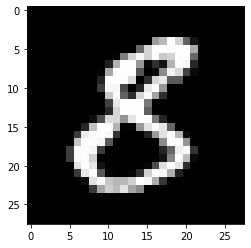

In [31]:
# Testing
t = 1234

plt.imshow(Image.fromarray(x_test[t].reshape(28, 28) * 256))
print('We expect ', np.argmax(y_test[t]))
x = np.expand_dims(x_test[t], axis = 0)
print('We get ', np.argmax(model.predict(x)))